# Pelabelan, Visualisasi, Dan Ekstraksi Fitur

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Pelabelan Vader Sentiment

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re

data_final = pd.read_csv('/content/gdrive/MyDrive/data_final_lagi.csv')

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Assuming 'data_final' is your DataFrame and 'data_final['data_final']' is the column containing text data
analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores
score = [analyzer.polarity_scores(x) for x in data_final['data_final']]
print(score)

# Create a new column 'compoundscore' in the DataFrame
data_final['compoundscore'] = [x['compound'] for x in score]

# Label sentiment based on compound score
data_final.loc[data_final['compoundscore'] <= -0.05, 'sentiment'] = 'negative'
data_final.loc[(data_final['compoundscore'] > -0.05) & (data_final['compoundscore'] < 0.05), 'sentiment'] = 'neutral'
data_final.loc[data_final['compoundscore'] >= 0.05, 'sentiment'] = 'positive'

# Save the relevant columns to a CSV file
data_final[['data_final', 'compoundscore', 'sentiment']].to_csv('output_pelabelan_data.csv', index=False)

[{'neg': 0.023, 'neu': 0.733, 'pos': 0.244, 'compound': 0.9749}, {'neg': 0.19, 'neu': 0.549, 'pos': 0.261, 'compound': 0.6697}, {'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compound': 0.8934}, {'neg': 0.071, 'neu': 0.627, 'pos': 0.302, 'compound': 0.9497}, {'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.8442}, {'neg': 0.035, 'neu': 0.54, 'pos': 0.424, 'compound': 0.9957}, {'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.6249}, {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.3818}, {'neg': 0.013, 'neu': 0.785, 'pos': 0.201, 'compound': 0.9408}, {'neg': 0.264, 'neu': 0.541, 'pos': 0.194, 'compound': -0.6605}, {'neg': 0.094, 'neu': 0.798, 'pos': 0.108, 'compound': 0.1243}, {'neg': 0.643, 'neu': 0.357, 'pos': 0.0, 'compound': -0.3818}, {'neg': 0.655, 'neu': 0.345, 'pos': 0.0, 'compound': -0.5849}, {'neg': 0.237, 'neu': 0.763, 'pos': 0.0, 'compound': -0.4215}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.3182}, 

# Pelabelan Text Blob

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob
score_2 = [TextBlob(x).sentiment.polarity for x in data_final['data_final']]
print (score_2)

data_final['score']= score_2
data_final.loc[data_final['score']<0, 'sentiment'] ='negative'
data_final.loc[data_final['score']==0, 'sentiment'] ='neutral'
data_final.loc[data_final['score']>0, 'sentiment'] ='positive'

data_final[['data_final','score','sentiment']].to_csv('pelabelan_textblob.csv')

# Splitting Data dan Ekstraksi Fitur

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [ ]:
data_final = pd.read_csv('/content/gdrive/MyDrive/data_final+label.csv')

In [ ]:
Y = data_final.loc[:,'label'].values
X = data_final.loc[:,'content'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
# Creating a transform
countVectorizer = CountVectorizer(ngram_range=(1,1))
XTrainVectorized = countVectorizer.fit_transform(X_train).toarray()
XTestVectorized = countVectorizer.transform(X_test).toarray()

In [ ]:
# Hitung frekuensi masing-masing label pada set pelatihan (train)
label_train, count_train = np.unique(Y_train, return_counts=True)
frekuensi_train = dict(zip(label_train, count_train))

# Hitung frekuensi masing-masing label pada set pengujian (test)
label_test, count_test = np.unique(Y_test, return_counts=True)
frekuensi_test = dict(zip(label_test, count_test))

In [ ]:
print("\nFrekuensi label pada set pelatihan:")
print(frekuensi_train)
print("\nFrekuensi label pada set pengujian:")
print(frekuensi_test)


Frekuensi label pada set pelatihan:
{'negative': 82, 'neutral': 39, 'positive': 79}

Frekuensi label pada set pengujian:
{'negative': 47, 'neutral': 7, 'positive': 33}


In [ ]:
print(countVectorizer.vocabulary_)

{'best': 154, 'ppks': 1126, 'really': 1222, 'trash': 1535, 'victim': 1594, 'sexual': 1356, 'violence': 1598, 'dare': 386, 'not': 1000, 'speak': 1411, 'hand': 678, 'badly': 134, 'rotten': 1296, 'shame': 1357, 'policy': 1114, 'discovered': 443, 'identity': 721, 'woman': 1632, 'jump': 806, 'floor': 608, 'compute': 313, 'city': 267, 'afternoon': 50, 'initiate': 762, 'ls': 887, 'resident': 1267, 'karangploso': 811, 'district': 452, 'lowokwaru': 885, 'chief': 253, 'akp': 60, 'anton': 84, 'result': 1277, 'data': 387, 'collect': 285, 'obtain': 1012, 'list': 872, 'math': 911, 'ipa': 789, 'mipa': 942, 'class': 269, 'but': 199, 'resign': 1268, 'disease': 445, 'disrupt': 449, 'parent': 1051, 'state': 1430, 'true': 1547, 'son': 1399, 'ill': 725, 'so': 1391, 'no': 996, 'longer': 881, 'study': 1446, 'confirm': 322, 'investigate': 783, 'scene': 1326, 'crime': 365, 'conclude': 316, 'suspect': 1476, 'deliberately': 402, 'commit': 296, 'suicide': 1458, 'drop': 469, 'fikom': 591, 'support': 1465, 'evident

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Langkah 1: Inisialisasi CountVectorizer dengan ngram_range=(1,1)
countVectorizer = CountVectorizer(ngram_range=(1,1))

# Langkah 2: Fit and Transform data
data = data_final['content']
ekstraksi_fitur = countVectorizer.fit_transform(data)

# Hasil ekstraksi fitur
print("Ekstraksi Fitur:")
print(ekstraksi_fitur.toarray())
print("Daftar Fitur:")
print(countVectorizer.vocabulary_)


Ekstraksi Fitur:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Daftar Fitur:
{'seek': 1696, 'support': 1855, 'reduce': 1570, 'greenhouse': 826, 'gas': 794, 'emissions': 615, 'govern': 818, 'target': 1886, 'rector': 1569, 'made': 1117, 'number': 1266, 'effort': 603, 'held': 862, 'nation': 1233, 'sustain': 1868, 'control': 419, 'carbon': 268, 'economy': 596, 'value': 2008, 'mechanist': 1150, 'manage': 1128, 'call': 257, 'priority': 1455, 'preserve': 1444, 'nature': 1234, 'plant': 1392, 'ended': 621, 'maintain': 1122, 'ecosystem': 597, 'so': 1756, 'not': 1260, 'product': 1466, 'but': 251, 'purpose': 1512, 'buffer': 240, 'railway': 1533, 'absorb': 9, 'prevent': 1451, 'erosion': 644, 'yes': 2092, 'area': 117, 'carry': 274, 'positive': 1419, 'impact': 913, 'green': 825, 'add': 37, 'protect': 1487, 'hectare': 860, 'look': 1104, 'google': 817, 'map': 1133, 'color': 360, 'future': 788, 'exist': 671, 'tree': 1944, 'cut': 4

In [ ]:
# Simpan hasil ekstraksi fitur dalam file CSV
df = pd.DataFrame(ekstraksi_fitur.toarray(), columns=countVectorizer.get_feature_names_out())
df.to_csv("ekstraksi_fitur.csv", index=False)

In [ ]:
data_train_ef = pd.DataFrame(XTrainVectorized, columns=countVectorizer.get_feature_names_out()[:XTrainVectorized.shape[1]])
data_train_ef.to_csv("ekstraksi_fitur_train.csv", index=False)

In [ ]:
train_data_mnbc = pd.DataFrame({'content': X_train, 'Label': Y_train})

In [ ]:
total_kata_positif = 0
for idx, row in train_data_mnbc .iterrows():
    if row['Label'] == 'positive':
        jumlah_kata = len(row['content'].split())
        total_kata_positif += jumlah_kata

print("Total jumlah kata dalam data berlabel positif:", total_kata_positif)

Total jumlah kata dalam data berlabel positif: 3986


In [ ]:
total_kata_label_neg= 0
for idx, row in train_data_mnbc.iterrows():
    if row['Label'] == 'negative':
        jumlah_kata = len(row['content'].split())
        total_kata_label_neg += jumlah_kata

print("Total jumlah kata dalam data berlabel positif:", total_kata_label_neg)

Total jumlah kata dalam data berlabel positif: 1200


In [ ]:
total_kata_label_neutral= 0
for idx, row in train_data_mnbc.iterrows():
    if row['Label'] == 'neutral':
        jumlah_kata = len(row['content'].split())
        total_kata_label_neutral += jumlah_kata

print("Total jumlah kata dalam data berlabel positif:", total_kata_label_neutral)

Total jumlah kata dalam data berlabel positif: 263


# Word Cloud

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import cv2

(-0.5, 499.5, 499.5, -0.5)

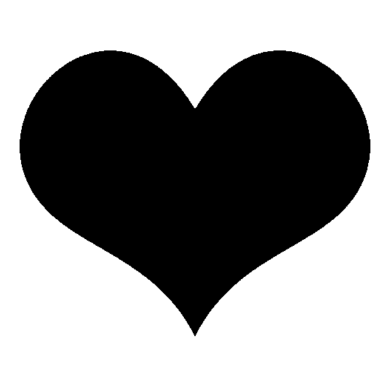

In [ ]:
from typing import Counter
# cv2 read image and convert to GBR
originalImage = cv2.imread("/content/gdrive/MyDrive/word_cloud_mask.jpg")
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)
# show the image
plt.imshow(cloud_mask, cmap=plt.cm.gray,interpolation='bilinear')
plt.axis("off")

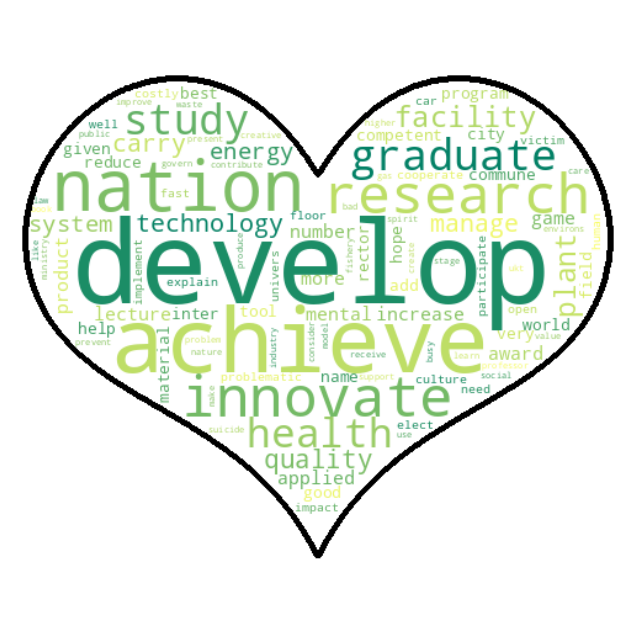

In [ ]:
data_content = data_final
sentiment= ''.join(data_content['content'])
count_words = Counter(sentiment.split())
wordcloud = WordCloud(background_color='white',mask=cloud_mask,max_words=100,contour_width=5,contour_color='black',colormap='summer_r').generate_from_frequencies(count_words)
plt.figure(figsize=(10,8),dpi=100)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('wordcloud.png')

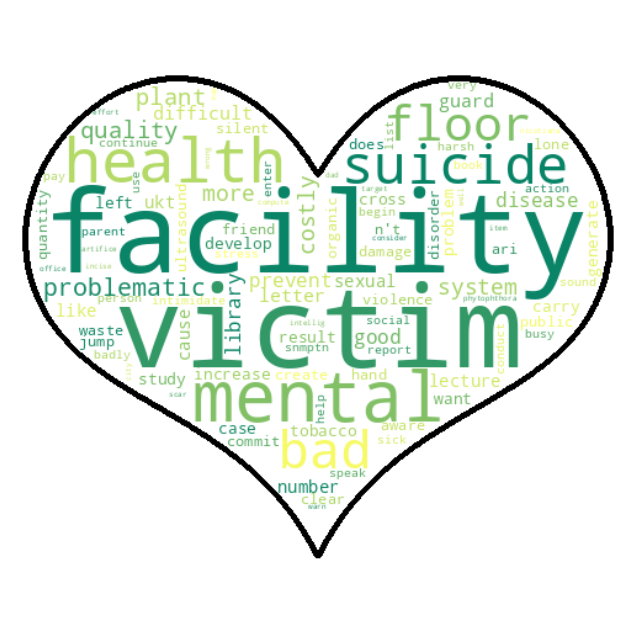

In [ ]:
data_content_negative = data_final[data_final['label']=="negative"]
sentiment_negative = ''.join(data_content_negative['content'])
count_words = Counter(sentiment_negative.split())
wordcloud_negative = WordCloud(background_color='white',mask=cloud_mask,max_words=100,contour_width=5,contour_color='black',colormap='summer_r').generate_from_frequencies(count_words)
plt.figure(figsize=(10,8),dpi=100)
plt.imshow(wordcloud_negative,interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud_negative.to_file('wordcloud_negative.png')

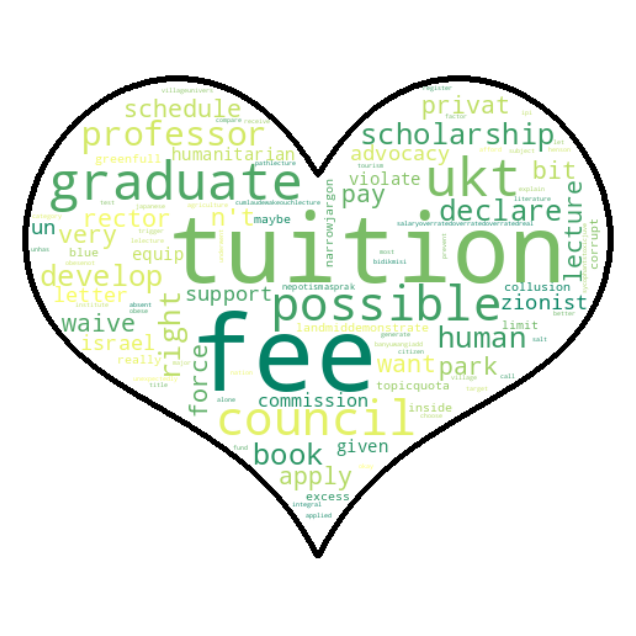

In [ ]:
data_content_neutral = data_final[data_final['label']=="neutral"]
sentiment_neutral = ''.join(data_content_neutral['content'])
count_words = Counter(sentiment_neutral.split())
wordcloud_neutral = WordCloud(background_color='white',mask=cloud_mask,max_words=100,contour_width=5,contour_color='black',colormap='summer_r').generate_from_frequencies(count_words)
plt.figure(figsize=(10,8),dpi=100)
plt.imshow(wordcloud_neutral,interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud_neutral.to_file('wordcloud_neutral.png')